# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [129]:
from yellowbrick.datasets.loaders import load_concrete
x,y = load_concrete()
print(x.shape)
print(y.shape)

(1030, 8)
(1030,)


### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [130]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

X_train, X_val, y_train, y_val = train_test_split(x,y, random_state = 0)


DT = DecisionTreeRegressor(random_state = 0, max_depth=5)
RF = RandomForestRegressor(random_state = 0, max_depth=5)
GB = GradientBoostingRegressor(random_state = 0, max_depth=5)

models = {"RF": RF, "DT": DT, "GB": GB}

results = pd.DataFrame(columns=['Training Accuracy', 'Validation Accuracy'])

for name in models:
    model = models.get(name)
    model.fit(X_train, y_train)
    scores = cross_validate(model, X_train, y_train, scoring='neg_mean_squared_error', return_train_score=True)
    results.loc[name] = {'Training Accuracy': (scores['train_score'].mean() *-1), 'Validation Accuracy': (scores['test_score'].mean()*-1)}

print(results)
    

    Training Accuracy  Validation Accuracy
RF          29.577455            45.059351
DT          47.279761            73.447331
GB           3.379440            22.783221


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [131]:
for name in models:
    model = models.get(name)
    model.fit(X_train, y_train)
    scores = cross_validate(model, X_train, y_train, scoring='r2', return_train_score=True)
    results.loc[name] = {'Training Accuracy': (scores['train_score'].mean()), 'Validation Accuracy': (scores['test_score'].mean())}

print(results)

    Training Accuracy  Validation Accuracy
RF           0.896557             0.840927
DT           0.834465             0.738697
GB           0.988171             0.919471


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

The results in all of the non-linear models was superior to the linear models used in Assignment 2. The cross validation R2 scores for the non-linear models were in the ranges of: Training (0.83 - 0.98) and Validation (0.73-0.91). These were both improvements over the linear models: Train (0.61), Validation (0.62). These figures indicate that the non-linear models were more suitable to at estimating the variablility within the target variable based on the feature sets.

The GradientBoostedRegressor had both the lowest negative mean squared errors, as well as the best training and validation accuracy. I would choose it as the best model for this dataset. 

In order to improve the performance of the tree-based models, we could try increasing the number of n_estimators used. For a RandomForest, this will increase the the time and memory cost of building and fitting the model, but should improve the results - albeit with diminishing returns. For the GradientBoostedRegressor, we could try tuning our parameters by procedurally adjusting and testing values for the n_estimators and the learning_rate parameters in order to achieve a high number of iterations while still controlling the model complexity to avoid overfitting. This should allow us to tune our model to the best possible performance.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?



All of the code used in this assignment was sourced from course notes, course examples, and previous lab work. Knowledge was supplemented from the Scikit documentation and tutorials.

I completed the steps in order, 1-5. 

I did not use generative AI for any part of this assignment. 

The most challenging part of this assignment was mainly in understanding exactly what the expectations were. The assignment was set before some of the course content was covered, but was completed after content such as normalization, scaling, and parameter tuning was discussed. Because some of the instructions are open for interpretation, I originally did parts of the assignment with parameter tuning and scaling, and then had to simplify my models based on feedback in class.  

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [132]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [133]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X_wine = wine.data.features 
y_wine = wine.data.targets['class']
   
print(X_wine.shape)
print(X_wine.dtypes)

print(y_wine.shape)
print(y_wine.dtypes)

(178, 13)
Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                           int64
dtype: object
(178,)
int64


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [134]:
X_wine.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [135]:
X_wine.isna().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

How many samples do we have of each type of wine?

In [136]:
y_wine.value_counts()

class
2    71
1    59
3    48
Name: count, dtype: int64

### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [137]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

X_train, X_val, y_train, y_val = train_test_split(X_wine, y_wine)
models = {}
svc = SVC(random_state=0)
dtc = DecisionTreeClassifier(max_depth=3, random_state=0)
models['svc'] = svc
models['dtc'] = dtc

results = pd.DataFrame(columns=['Training Accuracy', 'Validation Accuracy'])

for name in models:
    model = models.get(name)
    model.fit(X_train, y_train)
    scores = cross_validate(model, X_train, y_train, scoring='accuracy', return_train_score=True)
    results.loc[name] = {'Training Accuracy': (scores['train_score'].mean()), 'Validation Accuracy': (scores['test_score'].mean())}

print(results)



     Training Accuracy  Validation Accuracy
svc           0.671028             0.676353
dtc           0.988767             0.908832


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [138]:
# TO DO: Implement best model
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_val)


Text(170.97222222222223, 0.5, 'true value')

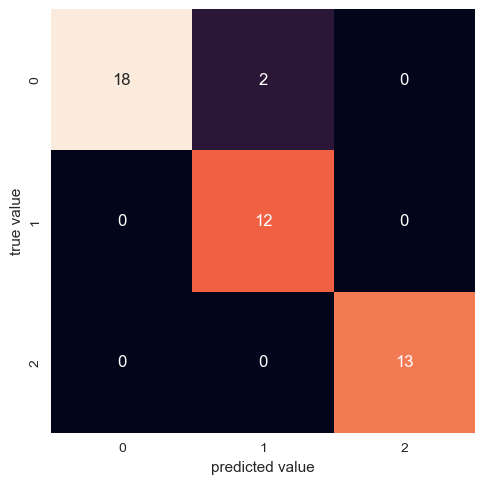

In [139]:
# TO DO: Print confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_val, dtc.predict(X_val))

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [140]:
# TO DO: Print classification report
from sklearn.metrics import classification_report
target_names = ['Wine Class 1', 'Wine Class 2', 'Wine Class 3']
print(classification_report(y_val, y_pred, target_names=target_names))


              precision    recall  f1-score   support

Wine Class 1       1.00      0.90      0.95        20
Wine Class 2       0.86      1.00      0.92        12
Wine Class 3       1.00      1.00      1.00        13

    accuracy                           0.96        45
   macro avg       0.95      0.97      0.96        45
weighted avg       0.96      0.96      0.96        45



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

Training and Validation accuracy were very low for the SVM model, (Training: 0.67, Validation: 0.66), whereas the Decision Tree Classifier model were much higher (Training: 0.99, Validation: 0.91). 

The Support Vector Machine performed poorly because SVMs are more sensitive to data scaling issues and hyperparameter tuning, neither of which were addressed in the model or data-preprocessing step for this assignment. The data should be scaled and normalized properly, and we should do a parameter grid search in order to improve the accuracy of the SVM.

In step 5.2, the model incorrectly classified 4 out of 45 samples. 

The decision between maximizing precision or recall is generally based upon the end use case for the data - is it more important that our classification results be highly accurate and lose some samples to false negatives (precision), or to include all the correct values at the expense of including more false positives (recall)? In this case, if we assume that the model is for a wine recommendation system, the 'cost' for a false positive (incorrectly including a wine in a classification) is more severe than the penalty for a false negative (leaving a wine out of the class), and we would therefore prioritize precision to minimize false positives. If we assume that the model is to allow us to allow us to find all wines of a class out of an entire inventory of wines, the cost of a false negative (missing some positives in the class) would be higher than the cost of having to reject some false positives - in this case we might prioritize recall in order to maximize the number of true positives captured. 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

All of the code used in this assignment was sourced from course notes, course examples, and previous lab work. Knowledge was supplemented from the Scikit documentation and tutorials.

I completed the steps in order, 1-5. 

I did not use generative AI for any part of this assignment. 

Most of my challenges for this section were syntax-related issues with some of the Sklearn functions which generated warnings, but not errors, such as needing to cast the y set of data into a 1d array instead of a numpy array. It was incredibly challenging to pinpoint the specific issues at hand. 

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.

In general, we can see that this dataset is clearly not a linear dataset, and we are much more successful in using non-linear models to describe it. We can see that our tree-based non-linear models provided good results, and did not rely on any heavy parameter tuning. The tree models were more successful when they were allowed to use a higher number of estimators, or do iterative improvements. This assignment also showed that despite SVMs being highly adaptable non-linear models, they do require significant pre-processing and hyperparamater tuning in order to return good results, and need to be implemented with care.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


I think this assignment was very effective in solidifying the concepts of the non-linear models - the tasks were well paced and allowed me to gradually implement the new models in a step-by-step fashion. The analysis questions were useful in linking the validation metrics to the actual considerations used in making the models. I feel like I understand most of the concepts involved much more thoroughly after doing this assignment than I did after either the lectures or the labs. I still find it challenging to parse out exactly what the expectations are for some of the steps, but I understand the difficulty in balancing how explicit to be while not just giving away the procedures. 

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

         Training Accuracy  Validation Accuracy
svc               0.671028             0.676353
dtc               0.988767             0.908832
lin_SVC           0.992470             0.962393
              precision    recall  f1-score   support

Wine Class 1       0.95      0.95      0.95        20
Wine Class 2       0.92      0.92      0.92        12
Wine Class 3       1.00      1.00      1.00        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



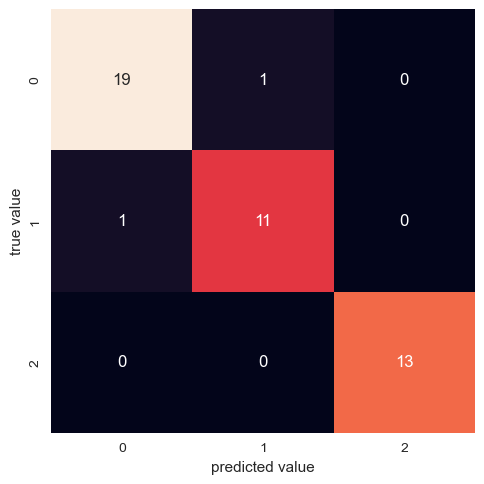

In [141]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC(max_iter=5000, dual='auto', random_state=0).fit(X_train, y_train)
result = cross_validate(lin_svc, X_train, y_train, scoring='accuracy', return_train_score=True)
results.loc["lin_SVC"] =  {'Training Accuracy': (result['train_score'].mean()), 'Validation Accuracy': (result['test_score'].mean())}
print(results)

mat = confusion_matrix(y_val, lin_svc.predict(X_val))

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

y_pred = lin_svc.predict(X_val)
print(classification_report(y_val, y_pred, target_names=target_names))

Based on the Training and Validation scores, it appears at first glance that the linear SVM classifier was an improvement on all of the other models tested. When we look at the confusion matrix, the model was also more successful in classifying the samples, with only 2/45 samples being incorrect. 

However, because we are strictly using the default parameters with no tuning, and no scaling on our dataset, we should be careful not to generalize this and declare it the best model. The linear SVM with default parameters is likely just the best fitting model for the *current state of the dataset*. Once we include the preprocessing and tuning steps, the other SVC models should generally always outperform the linear svc. 